# MITx: 6.431x
## Probability - The Science of Uncertainty and Data

**Table of Contents:**<a class="anchor" id="TOC"></a>
- [Unit 1: Probability models and axioms](#U1)
- [Unit 2: Conditioning and Independence](#U2)
    + [Bayes' Rule](#U2BR)


>## Unit 1: Probability models and axioms<a class="anchor" id="U1"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np #Used to integrate using numpy and to use numpy.random

import os
import sys
sys.path.append(os.path.abspath #Path to .py files for visualization
                ("C:/Users/joman/Google Drive/DATA SCIENCE/LEARNING MATERIAL/Visualization"))
from Probability_Sets import Sets_Space #import the Sets_Space class to visualize probability sets

from Hierarchy_tree import* #import the TreeGraph class stored in the Hierarchy_tree.py file 

from System_Layout import* #Import the SystemLayout class stored in System_Layout.py


from IPython.display import display, Math, Latex, Markdown

from plotly.graph_objs import *

#Function to print LateX as an outcome of a script:
def display_math(str_latex):
    display(Markdown('${}$'.format(str_latex)))

Consider the same model of two rolls of a tetrahedral die, with all 16 outcomes equally likely. Find the probability of the following events:

- a) The value in the first roll is strictly larger than the value in the second roll.
- b) The sum of the values obtained in the two rolls is an even number.

In [2]:
all_die = []
larger = 0
even = 0
for x in range(1,5):
    for y in range(1,5):
        all_die.append((x,y))
for roll in all_die:
    if roll[0] > roll[1]:
        larger += 1
    if (roll[0] + roll[1])%2 == 0:
        even += 1

sample = len(all_die)

print('a) Probability of first roll larger than second:')
display_math(r'P(larger) =\frac {%d}{%d}'%(larger,sample)) #%d is a placeholder for an integer
print('b) Probability of sum of two rolls is even:')
display_math(r'P(sum\,even) =\frac {%d}{%d}'%(even,sample))

a) Probability of first roll larger than second:


$P(larger) =\frac {6}{16}$

b) Probability of sum of two rolls is even:


$P(sum\,even) =\frac {8}{16}$

In [3]:
%%latex #Latex magic
$\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t}$ & = $\vec{\mathbf{0}} \
\nabla \cdot \vec{\mathbf{B}}$ & = 0


<IPython.core.display.Latex object>

## Axioms

### Nonnegativity Axiom:
A probability can't be negative, hence: $P(A)\geq 0$

### Normalization Axiom:
If the subset is the entire sample space $\Omega$, then $P(\Omega) = 1$

### (Finite) Additivity Axiom (abridged):
If $A\cap B = \emptyset$ , then $P(A\cup B) = P(A) + P(B)$

### Countable Additivity Axiom:
The probability calculation is discrete but the sample space is infinite. The sample space is indexed {1,2,...}.

Given $P(n)= \frac{1}{2^n}$, where $n=1,2,3,...$

### $$\sum_{n=1}^{\infty}\frac{1}{2^n} \color{red}{\text{=}} \frac{1}{2}\sum_{n=0}^{\infty}\frac{1}{2^n} \color{red}{\text{=}} \frac{1}{2}\cdot\frac{1}{1-(\frac{1}{2})} \color{red}{\text{=}} 1$$

If $A_1,A_2,A_3,...$ is a $\color{red}{\text{sequence}}$ of $\color{red}{\text{disjoint}}$ events, then $P(A_1\cup A_2\cup A_3\cup,...) = P(A_1)+P(A_2)+P(A_3)+...$

## Integration (Area under a curve)

### For a curve $F(x) = x^n$ :

### $\int_{a}^{b} x^{n}\cdot dx \left[\frac{x^{n+1}}{n+1}\right]^b_a = F(b) - F(a)$

### Example:

### $F(x) = x^2$

$a = 0$  *x-axis start limit*

$b = 1$  *x-axis end limit*

### $\int_{0}^{1} x^{2}\cdot dx = \left[\frac{x^{2+1}}{2+1}\right]^1_0 = F(1) - F(0)$

### $F(1) = \frac{1^3}{3}$

### $F(0) = \frac{0^3}{3}$

### $F(1) - F(0) = \frac{1^3}{3} - \frac{0^3}{3} = \frac{1}{3}$

### Area under the curve = $\frac{1}{3}$

Problem 1) Calculate the probability that $y$ is less than or equal to $x^2$, i.e. find area of the points that will fall under the curve $y=x^2$ enclosed in a rectangle of size 1X2. The rectangle is the sample space.

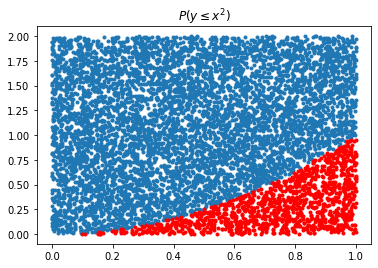

$P(y\leq x^2) = Area\, under\, curve =\int_{0}^{1} x^{2} dx = \left[\frac{x^{2+1}}{2+1} \
\right]^1_0 = F(1) - F(0) = \frac{1^{2+1}}{2+1} - \frac{0^{2+1}}{2+1} = \frac{1}{3}= 0.333333$

Estimated area:  0.333
Real probability using numpy: 0.3333333333333333
Real probability using scipy: 0.33333333333333337
Formula:


In [4]:
from scipy.integrate import quad #Used to integrate using scipy
%matplotlib inline

np.random.seed(0)

samples = 8000
sample_space_area = 1*2

x = np.random.uniform(0,1,samples) #x-axis limits are 0 - 1 (array w samples number of numbers bewtween 0 & 1)
y = np.random.uniform(0,2,samples) #y-axis limits are 0 - 2 (array w samples number of numbers bewtween 0 & 2)

under_curveX, under_curveY = x[x**2>=y], y[x**2>=y] #filter array x and y

under_curve_count = len(under_curveX) #points that will be below the curve
        
plt.plot(x[x**2<y],y[x**2<y],'.') #Plot values above the curve
plt.title(r'$P(y\leq x^2)$')
plt.plot(under_curveX,under_curveY,'.r') #Plot values below the curve
plt.show()

#Estimated area:
est_area = sample_space_area*under_curve_count/samples
print('Estimated area: ',est_area)

#Real area using integration:
#Integration using numpy:
p = np.poly1d([1,0,0]) #a 2 degree polynomial has three elements ax^2 + bx + c, in this case a=1,c&b=0
i = p.integ()
area_np = i(1)-i(0)
print('Real probability using numpy:',area_np)

#Integration using scipy.integrate quad():
f = lambda x:x**2 #Create a function using lambda
area_sci = quad(f,0.0,1.0) #insert the function and the lower and upper limits
print('Real probability using scipy:',area_sci[0])

#integral of y=x^2 as result of formula:
integral = lambda x:(x**3)/3
int_area = integral(1) - integral(0) #F(b) - F(a)

print('Formula:')
display_math(r'P(y\leq x^2) = Area\, under\, curve =\int_{0}^{1} x^{2} dx = \left[\frac{x^{2+1}}{2+1} \
\right]^1_0 = F(1) - F(0) = \frac{1^{2+1}}{2+1} - \frac{0^{2+1}}{2+1} = \frac{1}{3}= %f'%int_area)

## Discrete uniform probability (Finite set)

A set is discrete when its elements are countable and it is uniform if all elements are equally likely (have the same probability). A roll of an n-sided die is an example of a finite discrete set with uniform probability. An infinite set can also be countable (discrete).


## Sets

$x \in S$ reads as $x$ in set $S$ &nbsp;&nbsp; , &nbsp;&nbsp; $x \notin S$ reads as $x$ not in set $S$

a set $\{a,b,c,d\}$ is finite, as we can count 4 objects in it.

a set ${\Bbb R}$ (all real numbers) is infinite since we can't count how many objects it contains.

a set $\{x\in{\Bbb R}:cos(x)>\frac{1}{2}\}$ reads as "set of all $x$ in ${\Bbb R}$ in where $cos(x)>\frac{1}{2}$" (a condition is set after the colon).

$\Omega$ symbol is a Universal set

Smaller sets in $\Omega$ are denoted as $S$ and an object $x$ that lies in $\Omega$ but not in $S$ belongs to the set $S^c$ and is notated as follows: $$x\in S^c\quad\textrm{if}\quad x\in \Omega\quad\textrm{but}\quad x\notin S$$

which reads: "$x$ belongs to complement of $S$ (or $S^c$) if $x$ belongs to $\Omega$ but not to $S$".

Then we can say that a set $S$ inside $\Omega$ is the complement of the complement, i.e. $S = (S^c)^c$

$\emptyset$ is the symbol for an empty set ($\Omega^c = \emptyset$).

A set within a larger set is noted as $S\subset T$,which reads "$S$ subset of $T$". It is possible that the size of $S$ is equal to the size of $T$. It can be deducted that if $x\in S$ then $x\in T$

Set union: $S\cup T$ ($x\in S\cup T\iff x\in S\quad\textrm{or}\quad x\in T$)

$\iff$ means "if and only if".

Set intersection: $S\cap T$ ($x\in S\cap T\iff x\in S\quad\textrm{and}\quad x\in T$)

Infinite Sets: $S_n$ sets ($n$ being any positive integer) have the following rules: $$x\in \underset{n}{\cup}S_n \iff x\in S_n\quad\textrm{for some of }\quad n$$ $$x\in \underset{n}{\cap}S_n \iff x\in S_n \quad\textrm{for all of }\quad n$$

The union of a set with the Universal set is the Universal set: $S\cup\Omega = \Omega$

The intersection of the complement of a set with the set is an empty set: $S\cap S^c = \emptyset$

The intersection of a set with $\Omega$ is the set: $S\cap\Omega = S$

### De Morgan's Laws

$(S\cap T)^c = S^c\cup T^c$

$S^c\cap T^c = (S\cup T)^c$

For more than two sets: $$(\underset{n}{\cap} S_n)^c = \underset{n}{\cup} S_n^c$$ $$(\underset{n}{\cup} S_n)^c = \underset{n}{\cap} S_n^c$$ 


### GENIUSES AND CHOCOLATES PROBLEM

- 60% of students in a class are geniuses
- 70% are chocolate lovers
- 40% are both

Determine the probability that a random student will neither be a genius nor like chocolate.

The sample space $\Omega$ then consists of the sets Geniuses, Chocolate lovers, and Neither (3 sets).
- $P(G) = 0.6$ (set 1)
- $P(C) = 0.7$ (set 2)
- $P(G\cap C) = 0.4$ (intersection of set 1 and 2)
- $P((G\cup C)^c) =$ ? (set 3)

We can partition each segment within the sample space (using a Venn diagram will be helpful). To partition, sets must be disjoint. 2 of the sets are joined, but we can turn the 3 sets into 4 disjoint sets:

- $P(x)=$ samples only in $P((G\cup C)^c)$ (set 1)
- $P(y)=$ samples only in $P(G)$ (set 2)
- $P(z)=$ samples only in $P(G\cap C)$ (set 3)
- $P(w)=$ samples only in $P(C)$ (set 4)

Now we can use the axioms to solve the following:

$P(G) = P(y)\cup P(z) = P(y) + P(z)$

$P(C) = P(w)\cup P(z) = P(w) + P(z)$

$P(z) = 0.4$

$P(y) = 0.6 - P(z)$

$P(w) = 0.7 - P(z)$

Replacing: If $P(G) = 0.6$ and $P(G) = P(y) + 0.4$, then $P(y) + 0.4 = 0.6$ so finally $P(y) = 0.2$

Replacing: If $P(C) = 0.7$ and $P(C) = P(w) + 0.4$, then $P(w) + 0.4 = 0.7$ so finally $P(w) = 0.3$

Knowing that $P(\Omega) = 1$, then $P(y) + P(w) + P(z) + P(x) = 1$

Replacing: $0.2 + 0.3 + 0.4 + P(x) = 1$ $$P(x) = 1 - 0.9$$ $$P(x) = 0.1$$


In [5]:
# Code for Chocolates and Geniuses
def PofComplement(sets,intersections,r=5):
    """Calculate the complement of all sets in a sample space
    sets: dictionary set => probability float
    intersections: dictionary intersection => probability float
    r: round to r number of digits """
    
    union = set() #create a set of each partition probability
    for s in sets:
        for i in intersections:
            union.add(intersections[i]) #include the proability of this partition in the union set
            if s in str(i):
                #if a set is part of the intersection, substract the intersection
                union.add(round(sets[s]-intersections[i],r))
    #return the complement of the union, 1-union.
    return 'The probability of the complement is: %.2f'%round(1-sum(union),r) 

PofComplement({'G':0.6,'C':0.7},{'GC':0.4}) 

'The probability of the complement is: 0.10'

### Problem: Uniform probabilities on a square

Romeo and Juliet have a date at a given time, and each will arrive at the meeting place with a delay between 0 and 1 hour, with all pairs of delays being “equally likely," that is, according to a uniform probability law on the unit square. The first to arrive will wait for 15 minutes and will leave if the other has not arrived. What is the probability that they will meet?

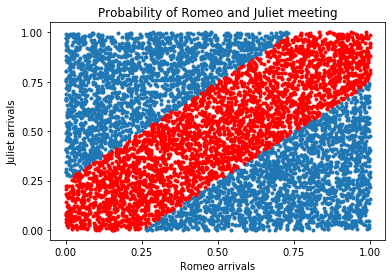

Estimated area: 0.438125 

Area by looking at the graph:


$Area\, Triangles = \left(\frac{0.75\times 0.75}{2}\right)\times 2 = 0.5625\\\
Area\, meeting = 1-0.5625 = 0.4375$

In [6]:
times = 8000

sampleSpace_area = 1

np.random.seed(0)
x = np.random.uniform(0,1,times)
y = np.random.uniform(0,1,times)

meetX = x[abs(x-y) <= 0.25] #Romeo is the x-axis, if he arrives first, he waits 1/4 of an hour 
meetY = y[abs(x-y) <= 0.25] #Juliet is the y-axis, if she arrives first, she waits 1/4 of an hour

est_area = (len(meetX)*sampleSpace_area)/times

plt.plot(x[abs(x-y) > 0.25],y[abs(x-y) > 0.25],'.')
plt.title('Probability of Romeo and Juliet meeting')
plt.xlabel('Romeo arrivals')
plt.ylabel('Juliet arrivals')
plt.xticks(np.arange(0,1.1,0.25)) #Use np.arange() because range() only works with integers
plt.yticks(np.arange(0,1.1,0.25))
plt.plot(meetX,meetY,'.r')
plt.show()

print('Estimated area:',est_area,'\n')
print('Area by looking at the graph:')
display_math(r'Area\, Triangles = \left(\frac{0.75\times 0.75}{2}\right)\times 2 = 0.5625\\\
Area\, meeting = 1-0.5625 = 0.4375')

# print(len(meetX),len(meetY))

>## [Unit 2: Conditioning and independence](#TOC)<a class="anchor" id="U2"></a>


### Exercise: Total probability theorem

We have an infinite collection of biased coins, indexed by the positive integers. Coin  $i$  has probability  $2^{−i}$ of being selected. A flip of coin  $i$  results in Heads with probability  $3^{−i}$ . We select a coin and flip it. What is the probability that the result is Heads? The geometric sum formula may be useful here:$\displaystyle\sum_{i=1}^{\infty}\alpha = \frac{\alpha}{1-\alpha}$ when $|\alpha| < 1$

Solution:

$P(Coin_i)\cdot P(H|Coin_i) = \frac{1}{2}\cdot \frac{1}{3} = \frac{1}{6}$

$= \displaystyle\sum_{i=1}^\infty\frac{1}{6} = \frac{\frac{1}{6}}{1-\frac{1}{6}} = \frac{6}{30} = \frac{1}{5}$

In [7]:
#Solution

#P(A∩B) = P(A)*P(B|A)
#P(B|A) = 1/3 that is 3^-1

def ConditionalProb(PeventA,Pevents): 
    intersections = {'event 1':PeventA}
    for e in range(len(Pevents)):
        intersections['event %d'%(e+2)] = round(intersections['event %d'%(e+1)]*Pevents[e], 5)
        
    Pxs = {'P(%s)'%i:round((intersections[i])/(1-intersections[i]),5) for i in intersections}
    Pxs['P(event 1)'] = PeventA #Correct the prob. of event A, if not it will show 1.
          
    return Pxs
        
print('Probability of coin flip results in heads:',ConditionalProb(0.5,[1/3])['P(event 2)'])       

Probability of coin flip results in heads: 0.2


### Conditional Probabilities

$P(A|B) = \frac{P(A\cap B)}{P(B)}$

$P(A|B)$ reads as *" probability of $A$ given $B$ "*

In [8]:
#Create a TreeGraph instance that shows the conditional probabilities of a radar when detecting planes:

radar_nodes = {0:('',[1,2]), #(Node name, [children])
               1:('$\color{blue}{\LARGE A}$',[3,4]),
               2:('$\color{blue}{\LARGE A^c}$',[5,6]),
               3:('$\color{blue}{\LARGE A}\LARGE \cap\color{red}{\LARGE B}$',None),
               4:('$\color{blue}{\LARGE A}\LARGE \cap\color{red}{\LARGE B^c}$',None),
               5:('$\color{blue}{\LARGE A^c}\LARGE \cap\color{red}{\LARGE B}$',None),
               6:('$\color{blue}{\LARGE A^c}\LARGE \cap\color{red}{\LARGE B^c}$',None)}

edge_labels = {'01':'$P(\color{blue}{A})\\\ 0.05$',
               '02':'$P(\color{blue}{A^c})\\\ 0.95$',
               '13':'$P(\color{red}{B}|\color{blue}{A})\\\ 0.99$',
               '14':'$P(\color{red}{B^c}|\color{blue}{A})\\\ 0.01$',
               '25':'$P(\color{red}{B}|\color{blue}{A^c})\\\ 0.1$',
               '26':'$P(\color{red}{B^c}|\color{blue}{A^c})\\\ 0.90$'}

edge_weights = {'01':0.05,'02':0.95,'13':0.99,'14':0.01,'25':0.1,'26':0.9}

G = TreeGraph(orientation='h',root=radar_nodes[0][0],spread=2,gap=0.12,
              nodes=radar_nodes,edge_weights=edge_weights,edge_labels=edge_labels)

G.generic_plotly_plot("Radar Probability of Detecting a Plane", 
                    title_pos=0.05, height=400, width=None,legend=False)


**Radar Example: Models based on conditional probabilities**

Event $\color{blue}{A}$: Airplane is flying above.

Event $\color{red}{B}$: Something registers on radar screen.

$P(\color{blue}{A}|\color{red}{B}) = \frac{P(\color{blue}{A}\cap\color{red}{B})}{P(\color{red}{B})}$ $\quad$ $\text{ equals}$ $\quad$ $P(\color{red}{B}|\color{blue}{A}) = \frac{P(\color{blue}{A}\cap\color{red}{B})}{P(\color{blue}{A})}$

$P(\color{red}{B}|\color{blue}{A}) \times P(\color{blue}{A})  = P(\color{blue}{A}\cap\color{red}{B})$

Looking at the probabilities of $P(\color{blue}{A})$ and $P(\color{red}{B}|\color{blue}{A})$:

* $P(\color{red}{B}|\color{blue}{A}) = 0.05 \times 0.99$

>$P(\color{red}{B}|\color{blue}{A}) = 0.0495$

* $P(\color{red}{B}) = 0.0495 + (0.95 \times 0.1)$

>$P(\color{red}{B}) = 0.1445)$ 

* $P(\color{blue}{A}|\color{red}{B}) = \frac{P(\color{blue}{A}\cap\color{red}{B})}{P(\color{red}{B})} = \frac{0.0495} {0.1445} = 0.34 = 34\%$

34% probability that there is a plane on the sky when the radar detects one is very low for a radar that detects a plane 99 percent of the time. The discussion about this issue continues later.

**Multiplication rule**

$P(\color{blue}{A^c}\cap\color{red}{B}\cap\color{#FF7E00}{C^c})$

The above expression can be rearranged as:

$= P(\color{blue}{A^c}\cap\color{red}{B})P(\color{#FF7E00}{C^c}|\color{blue}{A^c}\cap\color{red}{B})$

The above expression can be simplified as the multiplication of the prob. of the first event happening times the product(multiplication) of all the other events happening:

$= P(\color{blue}{A^c})\cdot P(\color{red}{B}|\color{blue}{A^c}) P(\color{#FF7E00}{C^c}|\color{blue}{A^c}\cap\color{red}{B})$

For  more events the rule holds:

$P(A_1\cap A_2\cap ...A_n)$   =   
$P(A_1)\displaystyle\prod_{i=2}^{n} P(A_i| A_1\cap...\cap A_{i-1})$

**Total Probability Theorem**

$P(\color{red}{B}) = \displaystyle\sum_{i}\color{blue}{P(A_i)}\color{red}{P(B|A_i)}$  
(The above equation returns a weighted average of $P(B|A_i)$)

#### [Bayes' Rule](#TOC)<a class="anchor" id="U2BR"></a>

- Systematic approach of incorporating new evidence and learning from experience.
- Make an inference of the probability of event $A_i$ ocurring given event $B$ has occurred, that is, when we can calculate the probability of $B$ in the direction $P(B|A_i)$ then we can infer the probability of $A_i$ in direction $P(A_i|B)$. If, at the end of the 'branch' we find $B$ occurred, what is the probability that $A_i$ also ocurred?

'Revised beliefs given that $B$ occurred.'

Bayes' is a simple calculation dividing the multiplication rule by the Total Probability Theorem: $$P(A_i|B) = \frac{\color{blue}{P(A_i)}\color{red}{P(B|A_i)}}{\displaystyle\sum_{j}\color{blue}{P(A_j)}\color{red}{P(B|A_j)}}$$

#### Exercise: Bayes' rule and the false-positive puzzle

A test for a certain rare disease is assumed to be correct  95%  of the time: if a person has the disease, the test result is positive with probability  0.95 , and if the person does not have the disease, the test result is negative with probability  0.95 . A person drawn at random from a certain population has probability  0.001  of having the disease.

1. Find the probability that a random person tests positive. (This answer will require an accuracy of 4 decimal places.)
2. Given that the person just tested positive, what is the probability he actually has the disease?

In [9]:
#Answers

test_nodes = {0:('',[1,2]),
            1:('$\color{green}{\LARGE S}$',[3,4]), #Patient is positive
            2:('$\color{green}{\LARGE S^c}$',[5,6]), #Patient is negative
            3:('$\color{green}{\LARGE S}\LARGE \cap\color{red}{\LARGE T}$',None), #Patient positive, Test positive
            4:('$\color{green}{\LARGE S}\LARGE \cap\color{red}{\LARGE T^c}$',None),#Patient positive, Test negative
            5:('$\color{green}{\LARGE S^c}\LARGE \cap\color{red}{\LARGE T^c}$',None),#Patient neg, Test neg
            6:('$\color{green}{\LARGE S^c}\LARGE \cap\color{red}{\LARGE T}$',None)}#Patient neg, Test pos

puzzle_edges_labls = {'01':'$P(\color{green}{S})\\\ 0.001$',
                   '02':'$P(\color{green}{S^c})\\\ 0.999$',
                   '13':'$P(\color{red}{T}|\color{green}{S})\\\ 0.95$',
                   '14':'$P(\color{red}{T^c}|\color{green}{S})\\\ 0.05$',
                   '25':'$P(\color{red}{T^c}|\color{green}{S^c})\\\ 0.95$',
                   '26':'$P(\color{red}{T}|\color{green}{S^c})\\\ 0.05$'}

puzzle_edge_weights = {'01':0.001,'02':0.999,'13':0.95,'14':0.05,'25':0.95,'26':0.05}

puzzle_legend = {'$\color{green}{\Large S}$':r'$\normalsize\textsf{ sick patient}$',
              '$\color{green}{\Large S^c}$':r'$\normalsize\textsf{ healthy patient}$',
              '$\color{red}{\Large T}$':r'$\normalsize\textsf{ test positive}$',
              '$\color{red}{\Large T^c}$':r'$\normalsize\textsf{ test negative}$'}

B_puzzle_tree = TreeGraph(orientation='h',root=test_nodes[0][0],spread=2,gap=0.12,
              nodes=test_nodes,edge_weights=puzzle_edge_weights,edge_labels=puzzle_edges_labls)

B_puzzle_tree.generic_plotly_plot("Patient Probability of Having Disease", 
                    title_pos=0.05, height=400, width=None, legend=True, legend_labels=puzzle_legend)

display_math(r'\text{Answer 1. }\,P(T)=(0.001\times 0.95) + (0.999\times 0.05)=%.4f\\ \text{Answer 2. }\, \
P(S|T)=\frac{P(S\cap T)}{P(T)}=\frac{0.001\times 0.95}{0.0509}=%.4f' 
             %((0.001*0.95)+(0.999*0.05),(0.001*0.95)/0.0509))


display_math(r'\text{Path from ROOT to }%s\text{ has a product of: %.5f}\\\text{Path from ROOT to }%s \
             \text{ has a product of: %.5f}' 
             % (test_nodes[3][0].strip('$').replace('\LARGE',''), #.strip() removes leading and trailing characters
                B_puzzle_tree.paths_product(0,3),test_nodes[6][0].strip('$').replace('\LARGE',''),
                B_puzzle_tree.paths_product(0,6)))

$\text{Answer 1. }\,P(T)=(0.001\times 0.95) + (0.999\times 0.05)=0.0509\\ \text{Answer 2. }\, \
P(S|T)=\frac{P(S\cap T)}{P(T)}=\frac{0.001\times 0.95}{0.0509}=0.0187$

$\text{Path from ROOT to }\color{green}{ S} \cap\color{red}{ T}\text{ has a product of: 0.00095}\\\text{Path from ROOT to }\color{green}{ S^c} \cap\color{red}{ T} \
             \text{ has a product of: 0.04995}$

In [10]:
# from itertools import product

coin_tosses = 3
node_children = [[1,8],[2,5],[3,4],None,None, [6,7],None,None,[9,12],[10,11],None,None,[13,14], None, None]

coin_nodes = build_nodeDict('HT',repeat=coin_tosses,children=node_children)#use build_nodeDict() from Hierarchy_tree

coin_edges_labls = {'01':'$P$','08':'$1-P$','12':'$P$','15':'$1-P$',
                   '23':'$P$','24':'$1-P$','56':'$P$','57':'$1-P$','89':'$P$','812':'$1-P$',
                   '910':'$P$','911':'$1-P$','1213':'$P$','1214':'$1-P$'}

coin_toss_tree = TreeGraph(orientation='h',root=coin_nodes[0][0],spread=2,gap=0.12,
              nodes=coin_nodes,edge_weights=None,edge_labels=coin_edges_labls)

coin_toss_tree.generic_plotly_plot("3 tosses of biased coin", 
                    title_pos=0.15, height=400, width=900, legend=False)

display_math(r'\text{What is the prob. of } THT \text{ occurring?} = (1-P)\cdot P\cdot (1-P) = \
P\cdot (1-P)^2\\\text{We are told only one head occurred, and we want to calculate the prob.}\
            \text{of it happening in the first toss. Possible result is:  }HTT.\\\text{What is the prob?}\
            P(\text{H first toss}|\text{1 head})=\frac{P(\text{H first toss }\cap\text{ 1 head})}{P(\text{1 head})}\
            = \frac{P\cdot (1-P)^2}{3P\cdot (1-P)^2}=1/3')


$\text{What is the prob. of } THT \text{ occurring?} = (1-P)\cdot P\cdot (1-P) = \
P\cdot (1-P)^2\\\text{We are told only one head occurred, and we want to calculate the prob.}\
            \text{of it happening in the first toss. Possible result is:  }HTT.\\\text{What is the prob?}\
            P(\text{H first toss}|\text{1 head})=\frac{P(\text{H first toss }\cap\text{ 1 head})}{P(\text{1 head})}\
            = \frac{P\cdot (1-P)^2}{3P\cdot (1-P)^2}=1/3$

Probability $P(H_2 | H_1) = P = P(H_2 | T_1)$ means that what happens in the 2nd toss is not dependent of what happened in the 1st toss. The events are independent.

$P(H_2) = P(H_1)\cdot P(H_2|H_1) + P(T_1)\cdot P(H_2|T_1) = P$


#### Independence

**Intuitive definition:** $P(B|A)=P(B)$ &nbsp; &nbsp; "Event $B$ is independent of $A$ if the probability of $B$ ocurring given $A$ is the same as the prob. of $B$."

**Formal Definition:** $P(A\cap B) = P(A)\cdot P(B)$ &nbsp; &nbsp; "If this equality holds, then the two events are independent."

If event $A$ is independent of event $B$, then event $A$ is also independent of event $B^c$, that's because $P(A\cap B^c) = P(A) - P(A\cap B) = P(A) - P(A)\cdot P(B) = P(A)\cdot (1-P(B))$ &nbsp; &nbsp; *recall that 1-P(B) is the same as P(B^c)*

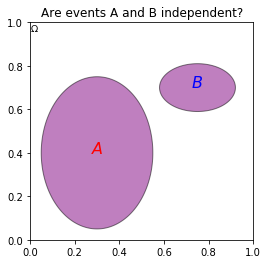

In [11]:
#Use imported Sets_Space class to visualize sets:
space1 = Sets_Space('events')

space1.add_Ellipse('event_A', (0.3,0.4), 0.25, 0.35, 0, 5000, 'purple', 0.5,'$A$',16, 'red',text_loc=None)
space1.add_Ellipse('event_B', (0.75,0.7), 0.11, 0.17, 90, 5000, 'purple', 0.5,'$B$',16, 'blue',text_loc=None)

space1.plot_Sets('Are events A and B independent?',figsize=4,partition=False,text_box=None)

$P(A)>0$ and $P(B)>0$

$P(A\cap B) = 0$

Whatever the value of $P(A)$ or $P(B)$, $P(A)\cdot P(B)\neq 0$ Therefore, events A and B are extremly dependent. 'If you're sure that $A$ ocurred, then you can be sure that $B$ didn't ocurred'.

#### Conditional Independece

$P(A\cap B|C) = P(A|C)\cdot P(B|C)$

"Notice that when there's no intersection between $A$ and $B$ but both intersect with $C$, there can be no independece: $P(A\cap B)$ = 0, then $P(A\cap B|C)$ also = 0 but $P(A|C)\cdot P(B|C)$ is > 0 (following the equation of independence above)."

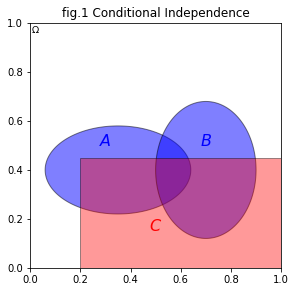

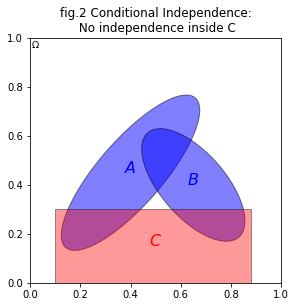

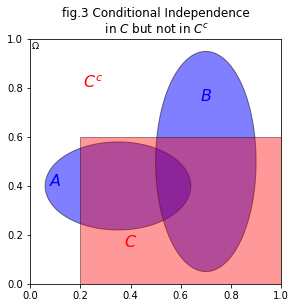

In [12]:
cond_independence = {1:dict(event='event_A',loc=(0.3,0.45),h=0.2,w=0.28,
                            a=40,res=5000,color='b',text='$A$',font=16,fontc='r'),
                    2:dict(event='event_B',loc=(0.7,0.45),h=0.2,w=0.28,
                            a=40,res=5000,color='b',text='$A$',font=16,fontc='r')}

independence_1 = Sets_Space('events_1')
independence_2 = Sets_Space('events_2')
independence_3 = Sets_Space('events_3')

independence_1.add_Ellipse('event_A', (0.35,0.4), 0.18, 0.29, 90, 5000, 'b', 0.5,'$A$',16, 'b',text_loc=(0.3,0.5))

independence_1.add_Ellipse('event_B', (0.7,0.4), 0.2, 0.28, 0, 5000, 'b', 0.5,'$B$',16, 'b',text_loc=(0.7,0.5))

independence_1.add_Box('event_C',corners=[(0.2,0),(0.2,0.45),(1,0.45),(1,0)],
              angle=0,fill_color='r',alpha=0.4,text='$C$',fontsize=16,fontcolor='r',
              text_loc=(0.5,0.15))

independence_2.add_Ellipse('event_A', (0.4,0.45), 0.13, 0.4, -40, 5000, 'b', 0.5,'$A$',16, 'b',text_loc=None)

independence_2.add_Ellipse('event_B', (0.65,0.4), 0.13, 0.28, 40, 5000, 'b', 0.5,'$B$',16, 'b',text_loc=None)

independence_2.add_Box('event_C',corners=[(0.1,0),(0.1,0.3),(0.88,0.3),(0.88,0)],
              angle=0,fill_color='r',alpha=0.4,text='$C$',fontsize=16,fontcolor='r',
              text_loc=(0.5,0.15))

independence_3.add_Ellipse('event_A', (0.35,0.4), 0.18, 0.29, 90, 5000, 'b', 0.5,'$A$',16, 'b',text_loc=(0.1,0.4))

independence_3.add_Ellipse('event_B', (0.7,0.5), 0.2, 0.45, 0, 5000, 'b', 0.5,'$B$',16, 'b',text_loc=(0.7,0.75))

independence_3.add_Box('event_C',corners=[(0.2,0),(0.2,0.6),(1,0.6),(1,0)],
              angle=0,fill_color='r',alpha=0.4,text='$C$',fontsize=16,fontcolor='r',
              text_loc=(0.4,0.15))
independence_3.add_Text('comp',(0.25,0.8),'$C^c$',16,'r')



independence_1.plot_Sets('fig.1 Conditional Independence',figsize=4.5,partition=False)
independence_2.plot_Sets('fig.2 Conditional Independence:\n No independence inside C',figsize=4.5,partition=False)
independence_3.plot_Sets('fig.3 Conditional Independence\n in $C$ but not in $C^c$',figsize=4.5,partition=False)


#### Independence of a collection of events

Events $A_i,A_2,...A_n$ are called independent if: $P(A_i\cap A_j\cap... A_m) = P(A_i)\cdot P(A_j)\cdot...P(A_m)$

1) Is it guaranteed that  $A∩C$  is independent from  $B^c∩D$ ?

If event $B^c∩D$ occurs, there is no change in the probability of $A∩C$ occuring, so the answer is Yes.

2) Is it guaranteed that  $A∩B^c∩D$  is independent from  $B^c∪D^c ?

If event $B^c∪D^c$ occured, event $D$ could not have occured, then the sequence $A∩B^c∩D$ did not occur making it dependent, so the answer is No.

### Exercise: Reliability

Suppose that each unit of a system is up with probability  2/3  and down with probability  1/3 . Different units are independent. For each one of the systems shown below, calculate the probability that the whole system is up (that is, that there exists a path from the left end to the right end, consisting entirely of units that are up). The intuitive meaning of independence tells us that whether some units are "up" or down, does not change the probabilities that some of the other units will be "up" or down.

C:\Users\joman\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.



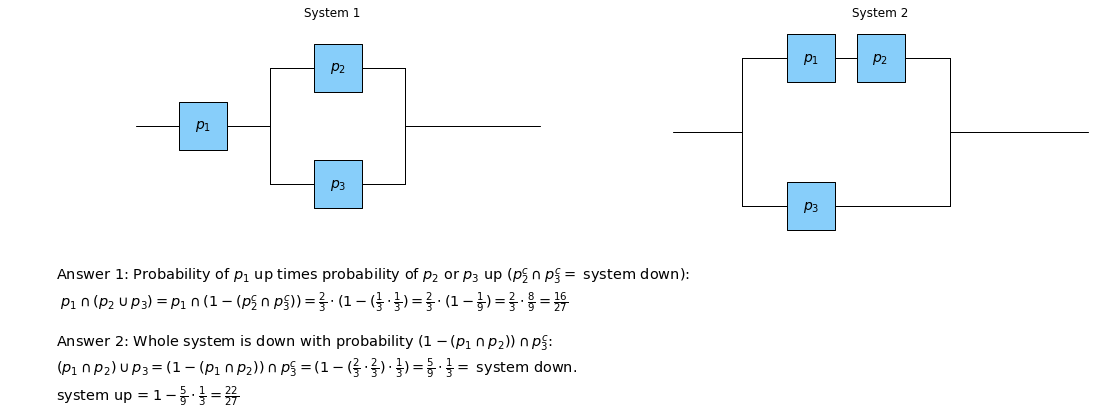

In [13]:
#Create a dictionary of nodes using integers as keys for system nodes and string keys for
#empty nodes using the following syntax: node -> (nodename,[list of children or None if missing],
#orientation of node)
units_1 = {0:('root',[1]),
        1:(r'$p_1$',['empty 0'],'E'),
        'empty 0':('empty 0',['empty 1','empty 2'],'E'), 
        'empty 1':('empty 1',[2],'N'),
        2:(r'$p_2$',['empty 3'],'E'),
        'empty 2':('empty 2',[3],'S'),
        3:(r'$p_3$',['empty 6'],'E'),
        'empty 3':('empty 3',['empty 4'],'E'),
        'empty 4':('empty 4',['empty 5'],'S'),
        'empty 5':('empty 5',None,'E'),
        'empty 6':('empty 6',['empty 7'],'E'),
        'empty 7':('empty 7',None,'N')}

units_2 = {0:('root',['empty 0']),
        'empty 0':('empty 0',['empty 1','empty 2'],'E'),
        'empty 1':('empty 1',[1],'N'), 
        'empty 2':('empty 2',[3],'S'),
        1:(r'$p_1$',[2],'E'),
        2:(r'$p_2$',['empty 3'],'E'),
        3:(r'$p_3$',['empty 5'],'E'),
        'empty 3':('empty 3',['empty 4'],'E'),
        'empty 4':('empty 4',['empty 6'],'S'),
        'empty 5':('empty 5',['empty 7'],'E'),
        'empty 6':('empty 6',None,'E'),
        'empty 7':('empty 7',['empty 8'],'E'),
        'empty 8':('empty 8',None,'N')}

root_1 = units_1[0]
root_2 = units_2[0]

system_1 = SystemLayout(root_1,(0,0.5),units_1,0.05,pos=None)
system_2 = SystemLayout(root_2,(0,0.5),units_2,0.3,pos=None)

answer1 = 'Answer 1: Probability of $p_1$ up times probability of $p_2$'+\
' or $p_3$ up ($p^c_2\cap p^c_3=$ system down):\n $p_1\cap (p_2\cup p_3)= p_1\cap (1-(p^c_2\cap p^c_3))'+\
r'=\frac{2}{3}\cdot (1-(\frac{1}{3}\cdot \frac{1}{3}) = \frac{2}{3}\cdot (1-\frac{1}{9})'+\
r' = \frac{2}{3}\cdot \frac{8}{9} = \frac{16}{27}$'
answer2 = 'Answer 2: Whole system is down with probability $(1-(p_1\cap p_2))\cap p^c_3$:'+\
'\n$(p_1\cap p_2)\cup p_3 = (1-(p_1\cap p_2))\cap p^c_3 =(1-'+\
r'(\frac{2}{3}\cdot\frac{2}{3})\cdot \frac{1}{3}) = \frac{5}{9}\cdot \frac{1}{3} =$ system down.'+\
'\n'+r'system up = $1-\frac{5}{9}\cdot \frac{1}{3} =\frac{22}{27}$'

plt.figure(figsize=(18, 6))

plt.subplot(121)
plt.annotate(answer1,size=14.5,xy=(0.05,0.25),xycoords='figure fraction')
plt.title('System 1')
system_1.draw_nx(empty_root=True,node_size=2300,node_color='lightskyblue')

plt.subplot(122)
plt.annotate(answer2,size=14.5,xy=(0.05,0.02),xycoords='figure fraction')
plt.title('System 2')

system_2.draw_nx(empty_root=True,node_size=2300,node_color='lightskyblue')
plt.subplots_adjust(bottom=0.4)
plt.show()

**King's Siblings Puzzle**

King has only one sibling. What's the probability of said sibling being a girl?

In [14]:
gender_tree_children = [[1,4],[2,3],None,None,[5,6], None,None]

gender_nodes = build_nodeDict('BG',2,gender_tree_children)#use build_nodeDict() from Hierarchy_tree

gender_edge_weights = {'01':0.5,'04':0.5,'12':0.66,'13':0.66,'45':0.66,'46':0.0}

gender_edges_labls = {'01':'$P(B)\\\ 0.5$','04':'$P(G)\\\ 0.5$','12':'$P(B|B)\\\ 0.66$',
                      '13':'$P(G|B)\\\ 0.66$','45':'$P(B|G)\\\ 0.66$','46':'$P(G|G)\\\ 0$'}


gender_tree = TreeGraph(orientation='h',root=gender_nodes[0][0],spread=1.5,gap=0.15,
              nodes=gender_nodes,edge_weights=gender_edge_weights,edge_labels=gender_edges_labls)

gender_tree.generic_plotly_plot("King's Sibling", title_pos=0.15, height=300, width=900, 
                                node_fontsize=14, legend=False, label_fontsize=10)

#Add probabilities of P(B)*P(G|B) + P(G)*P(B|G) that is, (paths 0 to 3) + (paths 0 to 5):
P_girl = gender_tree.paths_product(0,3) + gender_tree.paths_product(0,5) 

display_math(r'P(\text{sibling is girl})= (0.5\times 0.66) + (0.5\times 0.66)= %s'% P_girl)

$P(\text{sibling is girl})= (0.5\times 0.66) + (0.5\times 0.66)= 0.66$

In [15]:
#When using Graphviz library, read the help to change font family:
# with \
# open('C:/Users/user/Anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/share/doc/graphviz/doc/fontfaq.txt',
#      'rt') as fonts:   
#     gvFontHelp = fonts.read()
# print(gvFontHelp)

# from graphviz import Digraph

# dot = Digraph(comment='The Round Table',name='pet-shop', node_attr={'shape':'square','color':'red','fillcolor':'blue','style':'filled'})

# dot.node('0','A')
# dot.node('1','B')
# dot.node('2','C')

# dot.edges(['01','02'])

# dot

### A chess tournament problem

A chess tournament problem. This year's Belmont chess champion is to be selected by the following procedure. Bo and Ci, the leading challengers, first play a two-game match. If one of them wins both games, he gets to play a two-game second round with Al, the current champion. Al retains his championship unless a second round is required and the challenger beats Al in both games. If Al wins the initial game of the second round, no more games are played.

Furthermore, we know the following:
* The probability that Bo will beat Ci in any particular game is 0.6.
* The probability that Al will beat Bo in any particular game is 0.5.
* The probability that Al will beat Ci in any particular game is 0.7.

Assume no tie games are possible and all games are independent.

1. Determine the a priori probabilities that
   * a) the second round will be required.
   * b) Bo will win the first round.
   * c) Al will retain his championship this year.
   

2. Given that the second round is required, determine the conditional probabilities that
    * a) Bo is the surviving challenger.
    * b) Al retains his championship.


3. Given that the second round was required and that it comprised only one game, what is the conditional probability that it was Bo who won the first round?

In [16]:
chess_children = [None]*121 #create a list of 121 'None' entries. 
#Check the chess_nodes dictionary with the chess_children list being all 'None'...

chess_children[0] = [1,41] #... then change entries in list accordingly (Nodes that have children)
chess_children[1] = [2,15]
chess_children[2] = [3,11]
chess_children[3] = [4,6]
chess_children[41] = [42,55]
chess_children[55] = [60,64]
chess_children[60] = [62,63]

chess_nodes = build_nodeDict(['Bo','Ci','Al'],4,chess_children) #Tree has 4 levels (ignoring the root) 

In [17]:
chess_edge_weights = {'01':0.6,'041':0.4,'12':0.6,'115':0.4,'23':0.5,'211':0.5,'34':0.5,'36':0.5,
                     '4142':0.6,'4155':0.4,'5560':0.3,'5564':0.7,'6062':0.3,'6063':0.7}

chess_edges_labls = {'01':'$P(Bo)= 0.6$','041':'$P(Ci)= 0.4$','12':'$P(Bo|Bo)= 0.6$',
                    '115':'$P(Ci|Bo)= 0.4$','23':'$P(Bo|Bo\cap Bo)= 0.5$','211':'$P(Al|Bo\cap Bo)= 0.5$',
                    '34':'$P(Bo|Bo\cap Bo\cap Bo)= 0.5$','36':'$P(Al|Bo\cap Bo\cap Bo)= 0.5$',
                    '4142':'$P(Bo|Ci)= 0.6$','4155':'$P(Ci|Ci)= 0.4$','5560':'$P(Ci|Ci\cap Ci)=0.3$',
                    '5564':'$P(Al|Ci\cap Ci)=0.7$','6062':'$P(Ci|Ci\cap Ci\cap Ci)= 0.3$',
                    '6063':'$P(Al|Ci\cap Ci\cap Ci)= 0.7$'}

chess_tree = TreeGraph(orientation='h',root=chess_nodes[0][0],spread=3,gap=0.5,
              nodes=chess_nodes,edge_weights=chess_edge_weights,edge_labels=chess_edges_labls)

chess_tree.generic_plotly_plot("Chess Tournament", title_pos=0.14, height=480, width=900, 
                                node_fontsize=14, legend=False, label_fontsize=10)

P_1chess_a = chess_tree.paths_product(0,2) + chess_tree.paths_product(0,55) 
P_1chess_b = chess_tree.paths_product(0,2)
P_1chess_c = chess_tree.paths_product(0,4) + chess_tree.paths_product(0,62)

P_2chess_a = P_1chess_b/P_1chess_a
P_2chess_b = (chess_tree.paths_product(0,11) + chess_tree.paths_product(0,64) + \
             chess_tree.paths_product(0,6) + chess_tree.paths_product(0,63))/P_1chess_a

P_3chess = chess_tree.paths_product(0,11)/(chess_tree.paths_product(0,11) + chess_tree.paths_product(0,64))

display_math(r"\text{1a. }P(\text{2nd round})= (0.6\times 0.6) + (0.4\times 0.4)= %s \
\\\text{1b. }P(\text{Bo wins 1st round})= (0.6\times 0.6)= %s \
\\\text{1c. }P(\text{Al retains title})= 1-P(\text{Al doesn't retain title})= \
1-((0.6\times 0.6\times 0.5\times 0.5)+(0.4\times 0.4\times 0.3\times 0.3))=%s \
\\\text{2a. }P(\text{Bo wins 1st round}|\text{2nd round})= \
\frac{P(Bo\text{ wins 1st round }\cap\text{ 2nd round})}{P(\text{2nd round})}= \frac{0.36}{0.52}= %s \
\\\text{2b. }P(\text{Al retains title}|\text{2nd round})= \
\frac{P(Al\text{ retains title }\cap\text{ 2nd round})}{P(\text{2nd round})}= \
\frac{(0.6\times 0.6\times 0.5)+(0.4\times 0.4\times 0.7)+(0.6\times 0.6\times 0.5\times 0.5)+ \
(0.6\times 0.6\times 0.3\times 0.7)}{0.52}= %s \
\\\text{3. }P(\text{Bo wins 1st round}|\text{2nd round}\cap\text{1 game})= \
\frac{P(Bo\text{ wins 1st round }\cap\text{ 2nd round }\cap\text{ 1 game})}{P(\text{2nd round}\cap\text{ 1 game})}= \
\frac{0.18}{(0.6\times 0.6\times 0.5)+(0.4\times 0.4\times 0.7)}= %s" 
             % (P_1chess_a,P_1chess_b,1-P_1chess_c,P_2chess_a,P_2chess_b,P_3chess))

$\text{1a. }P(\text{2nd round})= (0.6\times 0.6) + (0.4\times 0.4)= 0.52 \
\\\text{1b. }P(\text{Bo wins 1st round})= (0.6\times 0.6)= 0.36 \
\\\text{1c. }P(\text{Al retains title})= 1-P(\text{Al doesn't retain title})= \
1-((0.6\times 0.6\times 0.5\times 0.5)+(0.4\times 0.4\times 0.3\times 0.3))=0.8956 \
\\\text{2a. }P(\text{Bo wins 1st round}|\text{2nd round})= \
\frac{P(Bo\text{ wins 1st round }\cap\text{ 2nd round})}{P(\text{2nd round})}= \frac{0.36}{0.52}= 0.6923076923076923 \
\\\text{2b. }P(\text{Al retains title}|\text{2nd round})= \
\frac{P(Al\text{ retains title }\cap\text{ 2nd round})}{P(\text{2nd round})}= \
\frac{(0.6\times 0.6\times 0.5)+(0.4\times 0.4\times 0.7)+(0.6\times 0.6\times 0.5\times 0.5)+ \
(0.6\times 0.6\times 0.3\times 0.7)}{0.52}= 0.7992307692307693 \
\\\text{3. }P(\text{Bo wins 1st round}|\text{2nd round}\cap\text{1 game})= \
\frac{P(Bo\text{ wins 1st round }\cap\text{ 2nd round }\cap\text{ 1 game})}{P(\text{2nd round}\cap\text{ 1 game})}= \
\frac{0.18}{(0.6\times 0.6\times 0.5)+(0.4\times 0.4\times 0.7)}= 0.6164383561643835$

### Coin tossing puzzle
A coin is tossed twice. Alice claims that the event of getting two Heads is at least as likely if we know that the first toss is Heads than if we know that at least one of the tosses is Heads. Is she right? Does it make a difference if the coin is fair or unfair? How can we generalize Alice's reasoning?

* $H_1 =$ Heads in first toss
* $H_2 =$ Heads in second toss


We can say that the probability of option 1 is greater than or equal to option 2 if we express it this way:

option 1) $P(H_2\cap H_1|H_1) = \frac{P((H_2\cap H_1)\cap H_1)}{P(H_1)}=\frac{P(H_2\cap H_1)}{P(H_1)}$
- *Bear in mind that the intersection of $H_2$ with $H_1$ is the same as the intersection of $(H_2\cap H_1)$ with $H_1$ and that's why we removed $\cap H_1$ in $(H_2\cap H_1)\cap H_1$. In other words, $(H_2\cap H_1)$ was a subset of $H_1$*

option 2) $P(H_2\cap H_1|H_1\cup H_2) = \frac{P((H_2\cap H_1)\cap(H_1\cup H_2))}{P(H_1\cup H_2)} = \frac{P(H_2\cap H_1)}{P(H_1\cup H_2)}$

If we do the equation with the probability of Heads in a fair coin, where P(H)=0.5, then we have the following:

option 1) $\frac{0.5\cdot0.5}{0.5} = 0.5$

option 2) $\frac{0.5\cdot0.5}{(0.5\cdot0.5)+(0.5\cdot0.5)+(0.5\cdot0.5)}=\frac{0.25}{0.75}=0.33$

In this case, option 1 is grater than option 2. Considering a biased coin, option 1 could be equal to option 2 but never less than.

Generalizing, $P(C|D)\geq P(C|E)$ where $C=H_2\cap H_1$ and $D=H_1$ and $E=H_2\cup H_1$

The tree below will help understand the process:

In [18]:
#Create tree
coinP_node_child = [[1,4],[2,3],None,None,[5,6],None,None]

coinP_nodes = build_nodeDict('HT',repeat=2,children=coinP_node_child)#use build_nodeDict() from Hierarchy_tree

coinP_edges_labls = {'01':'$p$','04':'$1-p$','12':'$p$','13':'$1-p$',
                   '45':'$p$','46':'$1-p$'}

coinP_toss_tree = TreeGraph(orientation='h',root=coinP_nodes[0][0],spread=0.5,gap=0.5,
              nodes=coinP_nodes,edge_weights=None,edge_labels=coinP_edges_labls)

coinP_toss_tree.generic_plotly_plot("2 tosses of biased or unbiased coin", 
                    title_pos=0.15, height=300, width=600, legend=False)

### The Monty Hall Problem

This is a much discussed puzzle, based on an old American game show. You are told that a prize is equally likely to be found behind any one of three closed doors in front of you. You point to one of the doors. A friend opens for you one of the remaining two doors, after making sure that the prize is not behind it. At this point, you can stick to your initial choice, or switch to the other unopened door. You win the prize if it lies behind your final choice of a door. Consider the following strategies:

- Stick to your initial choice.

- Switch to the other unopened door.

- You first point to door 1. If door 2 is opened, you do not switch. If door 3 is opened, you switch.

Which is the best strategy?

Answer:

1st pick is right: $P =\frac{1}{3}$

1st pick is wrong: $P =1-\frac{1}{3} = \frac{2}{3}$

Regarding the first 2 points, switching is better because there's more probability of being wrong in the first pick.

For the 3rd point, a tree is drawn showing the branches of picking door 1 first:

In [19]:
#Create tree
door_nodes = {0:('Door 1',[1,4,6]), 1:('Prize in 1',[2,3]), 
              2:('Open 2',None), 3:('Open 3',None), 4:('Prize in 2',[5]),
              5:('Open 3_',None), 6:('Prize in 3',[7]), 7:('Open 2_',None)}#Underscore= node names can't be repeated

door_edges_labls = {'01':r'$\frac{1}{3}$','04':r'$\frac{1}{3}$','06':r'$\frac{1}{3}$','12':'$p$',
                   '13':'$1-p$','45':'$1$','67':'$1$'}

door_tree = TreeGraph(orientation='h',root=door_nodes[0][0],spread=0.5,gap=0.08,
              nodes=door_nodes,edge_weights=None,edge_labels=door_edges_labls)

door_tree.generic_plotly_plot("3rd Strategy for Monty Hall", 
                    title_pos=0.15, height=300, width=1200, legend=False)

display_math(r"p\text{ is the probability of opening either door 2 or 3 in the first branch, a number between 0-1}\
\\\text{If prize is in 1 and door 2 is opened you win with probability: }\frac{1}{3}\cdot p \
\\\text{If prize is in 1 and door 3 is opened you loose with probability: }\frac{1}{3}\cdot (1-p) \
\\\text{If prize is in 2 then door 3 is opend and you win with probability: }\frac{1}{3}\cdot 1 \
\\\text{If prize is in 3 then door 2 is opened and you loose with probability: }\frac{1}{3}\cdot 1 \
\\\text{Add the probabilities of winning: }(\frac{1}{3}\cdot p)+(\frac{1}{3})\\\text{if }p=0\text{ , } \
P(win)=\frac{1}{3}\text{ , if }p=1\text{ , }P(win)=\frac{2}{3}")

$p\text{ is the probability of opening either door 2 or 3 in the first branch, a number between 0-1}\
\\\text{If prize is in 1 and door 2 is opened you win with probability: }\frac{1}{3}\cdot p \
\\\text{If prize is in 1 and door 3 is opened you loose with probability: }\frac{1}{3}\cdot (1-p) \
\\\text{If prize is in 2 then door 3 is opend and you win with probability: }\frac{1}{3}\cdot 1 \
\\\text{If prize is in 3 then door 2 is opened and you loose with probability: }\frac{1}{3}\cdot 1 \
\\\text{Add the probabilities of winning: }(\frac{1}{3}\cdot p)+(\frac{1}{3})\\\text{if }p=0\text{ , } \
P(win)=\frac{1}{3}\text{ , if }p=1\text{ , }P(win)=\frac{2}{3}$

### A random walker. 

Imagine a drunk tightrope walker, who manages to keep his balance, but takes a step forward with probability  p  and takes a step back with probability  (1−p) .

(a) What is the probability that after two steps, the tightrope walker will be at the same place on the rope as where he started?

(b) What is the probability that after three steps, the tightrope walker will be one step forward from where he started?

(c) Given that after three steps he has managed to move ahead one step, what is the probability that the first step he took was a step forward?

In [20]:
walker_node_child = [[1,8],[2,5],[3,4],None,None, [6,7],None,None,[9,12],[10,11],None,None,[13,14], None, None]

walker_nodes = build_nodeDict('FB',repeat=3,children=walker_node_child)#use build_nodeDict() from Hierarchy_tree

walker_edges_labls = {'01':'$p$','08':'$1-p$','12':'$p$','15':'$1-p$',
                   '23':'$p$','24':'$1-p$','56':'$p$','57':'$1-p$','89':'$p$','812':'$1-p$',
                   '910':'$p$','911':'$1-p$','1213':'$p$','1214':'$1-p$'}

walker_tree = TreeGraph(orientation='h',root=walker_nodes[0][0],spread=0.5,gap=0.08,
              nodes=walker_nodes,edge_weights=None,edge_labels=walker_edges_labls)

walker_tree.generic_plotly_plot("Random Walker", title_pos=0.15, height=300, width=800, legend=False)

display_math(r"\text{(a) }=FB+BF=(p\cdot(1-p))+(p\cdot(1-p))=2p(1-p)\\\text{(b) }=FFB+FBF+BFF= \
(p^2\cdot(1-p))+(p^2\cdot(1-p))+ (p^2\cdot(1-p))=3p^2(1-p)\\\text{(c) }P(F_1|\text{(b)})= \
\frac{P(F_1\cap (b))}{P\text{(b)}}=F_1\text{ is a subset of (b) }=\frac{2p^2(1-p)}{3p^2(1-p)}=\frac{2}{3}")

$\text{(a) }=FB+BF=(p\cdot(1-p))+(p\cdot(1-p))=2p(1-p)\\\text{(b) }=FFB+FBF+BFF= \
(p^2\cdot(1-p))+(p^2\cdot(1-p))+ (p^2\cdot(1-p))=3p^2(1-p)\\\text{(c) }P(F_1|\text{(b)})= \
\frac{P(F_1\cap (b))}{P\text{(b)}}=F_1\text{ is a subset of (b) }=\frac{2p^2(1-p)}{3p^2(1-p)}=\frac{2}{3}$

### Communication over a noisy channel

A source transmits a message (a string of symbols) over a noisy communication channel. Each symbol is  0  or  1  with probability  $p$  and  $1−p$ , respectively, and is received incorrectly with probability  $ϵ0$  and  $ϵ1$ , respectively (see the figure below). Errors in different symbol transmissions are independent.

(a) What is the probability that the  $k$ th symbol is received correctly?

(b) What is the probability that the string of symbols  1011  is received correctly? 

(c) In an effort to improve reliability, each symbol is transmitted three times and the received string is decoded by majority rule. In other words, a  0  (or  1 ) is transmitted as  000  (or  111 , respectively), and it is decoded at the receiver as a  0  (or  1 ) if and only if the received three-symbol string contains at least two  0 's (or  1 's, respectively). What is the probability that a  0  is correctly decoded?

(d) For what values of  $ϵ0$  is there an improvement in the probability of correct decoding of a  0  when the scheme of part (c) is used? 

(e) Suppose that the scheme of part (c) is used. What is the probability that a symbol was  0  given that the received string is  101 ?

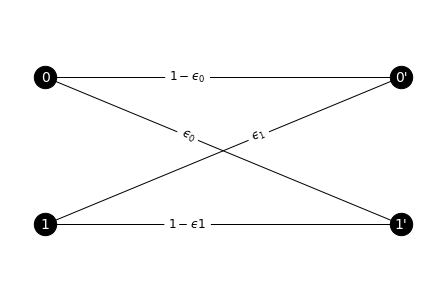

In [21]:
#Figure
noisy_pos = {"0":(0.5,0.5),"0'":(1,0.5),"1":(0.5,0.4),"1'":(1,0.4)}
noisy_edges = [("0","0'"),("0","1'"),("0'","1"),("1","1'")]
noisy_c = nx.Graph()

noisy_c.add_nodes_from(noisy_pos.keys())
noisy_c.add_edges_from(noisy_edges)

nx.draw(noisy_c,noisy_pos,node_size=500,node_color='k',with_labels=True,font_size=14,font_color='white')
nx.draw_networkx_edge_labels(noisy_c,noisy_pos,edge_labels={("0","0'"):r'$1-ϵ_0$',("0","1'"):r'$ϵ_0$',
                                                            ("0'","1"):r'$ϵ_1$',("1","1'"):r'$1-ϵ1$'},
                             label_pos=0.6,font_size=12)
plt.show()

In [22]:
channel_children = [[1,4],[2,3],None,None,[5,6],None,None]
channel_nodes = build_nodeDict('01',repeat=2,children=channel_children)

channel_edges_labls = {'01':'$p$','04':'$1-p$','12':'$1-\epsilon_0$','13':'$\epsilon_0$',
                   '45':'$\epsilon_1$','46':'$1-\epsilon_1$'}

channel_tree = TreeGraph(orientation='h',root=channel_nodes[0][0],spread=0.5,gap=0.08,
              nodes=channel_nodes,edge_weights=None,edge_labels=channel_edges_labls)

channel_tree.generic_plotly_plot("Noisy Channel", title_pos=0.15, height=300, width=800, legend=False)


display_math(r"\text{(a) }=0\cap0+1\cap1=(p\cdot(1-\epsilon_0))+((1-p)\cdot(1-\epsilon_1)) \
=\text{ apply Law of Total Probability = }P(0)P(1-\epsilon_0|0) + P(1)P(1-\epsilon_1|1) \
\\\text{(b) } P(1101) = P(1\cap1\cap0\cap1) = P(1)P(1)P(0)P(1) = (1-\epsilon_1)(1-\epsilon_1) \
(1-\epsilon_0)(1-\epsilon_1) = (1-\epsilon_0)(1-\epsilon_1)^3\\\text{(c) Majority rule of 0s occurs in:} \
(0\cdot0\cdot0)+(0\cdot0\cdot1)+(0\cdot1\cdot0)+(1\cdot0\cdot0) = (1-\epsilon_0)^3 + 3(1-\epsilon_0)^2\epsilon_0 \
\\\text{(d) With (c) scheme:}P(success)=(1-\epsilon_0)^3 + 3(1-\epsilon_0)^2\epsilon_0\text{ without scheme:}\
P(success)=(1-\epsilon_0)\\\text{ therefore : } 3\epsilon_0(1-\epsilon_0)^2+(1-\epsilon_0)^3 > \
(1-\epsilon_0) \text{ Solving the polynomial inequality : }\frac{3ϵ_0(1-ϵ_0)^2+(1-ϵ_0)^3}{(1-ϵ_0)}>1 =\
(1-ϵ_0)(1+2ϵ_0)>1\\\text{Finally, ϵ_0 has to be greater than 0 and less than 0.5 to improve probability: }0<ϵ_0<0.5\
\\\text{(e)} P(0\text{ sent}|101)=\text{ Bayes' Rule = }\frac{P(0)P(101|0\text{ sent})}{(P(0)P(101|0\text{ sent})) \
+(P(1)P(101|1\text{ sent}))}\text{ components : }P(0)=p, P(1)=(1-p), P(101|0)=(1-ϵ_0)ϵ_0^2,\\\ P(101|1) \
=(1-ϵ_1)^2ϵ_1\text{ Finally : }\frac{p\cdot(1-ϵ_0)ϵ_0^2}{(p\cdot(1-ϵ_0)ϵ_0^2) + ((1-p)\cdot(1-ϵ_1)^2ϵ_1)}")

$\text{(a) }=0\cap0+1\cap1=(p\cdot(1-\epsilon_0))+((1-p)\cdot(1-\epsilon_1)) \
=\text{ apply Law of Total Probability = }P(0)P(1-\epsilon_0|0) + P(1)P(1-\epsilon_1|1) \
\\\text{(b) } P(1101) = P(1\cap1\cap0\cap1) = P(1)P(1)P(0)P(1) = (1-\epsilon_1)(1-\epsilon_1) \
(1-\epsilon_0)(1-\epsilon_1) = (1-\epsilon_0)(1-\epsilon_1)^3\\\text{(c) Majority rule of 0s occurs in:} \
(0\cdot0\cdot0)+(0\cdot0\cdot1)+(0\cdot1\cdot0)+(1\cdot0\cdot0) = (1-\epsilon_0)^3 + 3(1-\epsilon_0)^2\epsilon_0 \
\\\text{(d) With (c) scheme:}P(success)=(1-\epsilon_0)^3 + 3(1-\epsilon_0)^2\epsilon_0\text{ without scheme:}\
P(success)=(1-\epsilon_0)\\\text{ therefore : } 3\epsilon_0(1-\epsilon_0)^2+(1-\epsilon_0)^3 > \
(1-\epsilon_0) \text{ Solving the polynomial inequality : }\frac{3ϵ_0(1-ϵ_0)^2+(1-ϵ_0)^3}{(1-ϵ_0)}>1 =\
(1-ϵ_0)(1+2ϵ_0)>1\\\text{Finally, ϵ_0 has to be greater than 0 and less than 0.5 to improve probability: }0<ϵ_0<0.5\
\\\text{(e)} P(0\text{ sent}|101)=\text{ Bayes' Rule = }\frac{P(0)P(101|0\text{ sent})}{(P(0)P(101|0\text{ sent})) \
+(P(1)P(101|1\text{ sent}))}\text{ components : }P(0)=p, P(1)=(1-p), P(101|0)=(1-ϵ_0)ϵ_0^2,\\\ P(101|1) \
=(1-ϵ_1)^2ϵ_1\text{ Finally : }\frac{p\cdot(1-ϵ_0)ϵ_0^2}{(p\cdot(1-ϵ_0)ϵ_0^2) + ((1-p)\cdot(1-ϵ_1)^2ϵ_1)}$

### Network reliability

An electrical system consists of identical components, each of which is operational with probability  p , independent of other components. The components are connected in three subsystems, as shown in the figure. The system is operational if there is a path that starts at point  A , ends at point  B , and consists of operational components. What is the probability of this happening?

In [23]:
system_elec_attr_list = [(0,'root',[1]),(1,'1',['empty 0'],'E'),('empty 0','empty 0',['empty 1','empty 13'],'E'),
    ('empty 1','empty 1',['empty 2',5,'empty 11'],'E'),('empty 2','empty 2',[2],'N'),(2,'2',['empty 3'],'E'),
    ('empty 3','empty 3',['empty 4'],'E'),('empty 4','empty 4',[3],'N'),(3,'3',['empty 5'],'E'),
    ('empty 5','empty 5',['empty 6'],'E'),('empty 6','empty 6',['empty 7','empty 21'],'E'),
    ('empty 7','empty 7',[4],'N'),(4,'4',['empty 8'],'E'),('empty 8','empty 8',['empty 9'],'E'),
    ('empty 9','empty 9',['empty 10'],'S'),('empty 10','empty 10',None,'E'),(5,'5',['empty 4'],'E'),
    ('empty 11','empty 11',[6],'S'),(6,'6',['empty 12'],'E'),('empty 12','empty 12',['empty 4'],'E'),
    ('empty 13','empty 13',['empty 14'],'S'),('empty 14','empty 14',[7],'S'),(7,'7',['empty 15'],'E'),
    ('empty 15','empty 15',['empty 16'],'E'),('empty 16','empty 16',['empty 17'],'E'),
    ('empty 17','empty 17',['empty 18'],'E'),('empty 18','empty 18',['empty 19'],'E'),
    ('empty 19','empty 19',['empty 20'],'N'),('empty 20','empty 20',['empty 5'],'N'),('empty 21','empty 21',[8],'S'),
    (8,'8',['empty 22'],'E'),('empty 22','empty 22',['empty 23'],'E'),('empty 23','empty 23',['empty 24'],'N'),
    ('empty 24','empty 24',['empty 9'],'N')]

system_elec_nodes = {}
system_elec_nodes[system_elec_attr_list[0][0]] = (system_elec_attr_list[0][1],system_elec_attr_list[0][2])
for n in system_elec_attr_list[1:]:
    system_elec_nodes[n[0]] = (n[1],n[2],n[3])

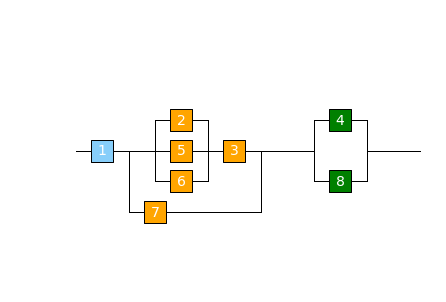

In [24]:
system_elec = SystemLayout(system_elec_nodes[0],(0,0.5),system_elec_nodes,0.01,pos=None)

color_map = []

for n in system_elec_nodes: #Create a list of colors to assign to each node according to index value
    if n == 0:
        color_map.append('lightskyblue')
    elif n in [1,2,4,5,6]:
        color_map.append('orange')
    elif type(n) == int:
        color_map.append('green')
    
system_elec.draw_nx(empty_root=True,node_size=500,node_color=color_map,font_color='w')

When components in serial structure are independent, you just multiply the probability of success. In this case, components 1,7 and 3 run in a serial structure. When components run in parallel, it's easier to consider the probabilities of failure $(1-p)$ and substract that from 1. In this case, components 2,5,6 run in parallel in the orange section and components 4 and 8 run in parallel in the green section.

$P(\text{component 1}) = p$

$P(\text{component 2,5,6}) = 1-(1-p)^3$

$P(\text{component 7}) = p$

$P(\text{component 3}) = p$

$P(\text{component 4,8}) = 1-(1-p)^2$

The final formula is: $p\cdot(1-(1-p)^3)\cdot p\cdot p\cdot  (1-(1-p)^2$